In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
def set_pandas_display_options() -> None:
    display = pd.options.display
    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = None

set_pandas_display_options()

In [64]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [73]:
df_google = pd.read_csv("google_trend_data/google_trend_region.csv")
df_google = df_google.drop(['iso', 'country', 'geoCode'], axis=1)
df_google['date'] = pd.to_datetime(df_google['date'])
df_google.rename(columns={'geoName':'state'}, inplace=True)
df_google['state'] = df_google['state'].map(lambda x: us_state_abbrev[x])
df_google.head()

,date,state,coronavirus,covid,dry cough,fever,shortness of breath,face mask
0,2020-01-01,AL,0,0,0,25,43,3
1,2020-01-02,AL,0,0,0,35,20,2
2,2020-01-03,AL,0,0,0,32,0,0
3,2020-01-04,AL,0,0,35,35,0,2
4,2020-01-05,AL,0,0,18,23,43,2


In [74]:
df_weather = pd.read_csv("weather_data_0411.csv", index_col=0)
df_weather.rename(columns={'Date':'date', 'Province_State':'state'}, inplace=True)
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather['state'] = df_weather['state'].map(lambda x: us_state_abbrev[x])
df_weather.head()

,date,Country_Region,state,ConfirmedCases,Fatalities,Lat,Long,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
19197,2020-01-22,US,AL,0.0,0.0,32.3182,-86.9023,33.7,21.6,48.9,999.9,NaN,NaN,NaN,NaN,2.5,0.00,0
19198,2020-01-23,US,AL,0.0,0.0,32.3182,-86.9023,41.5,37.9,46.2,999.9,NaN,NaN,NaN,NaN,2.8,0.00,0
19199,2020-01-24,US,AL,0.0,0.0,32.3182,-86.9023,51.6,45.9,61.0,999.9,NaN,NaN,NaN,NaN,4.9,0.87,0
19200,2020-01-25,US,AL,0.0,0.0,32.3182,-86.9023,43.1,29.5,57.0,999.9,NaN,NaN,NaN,NaN,5.4,0.02,0
19201,2020-01-26,US,AL,0.0,0.0,32.3182,-86.9023,42.5,31.6,53.8,999.9,NaN,NaN,NaN,NaN,2.0,0.00,0


In [75]:
df_weather = df_weather[['date','state','temp', 'stp', 'wdsp', 'prcp','fog']].reset_index(drop=True)
df_weather.head()

,date,state,temp,stp,wdsp,prcp,fog
0,2020-01-22,AL,33.7,999.9,2.5,0.00,0
1,2020-01-23,AL,41.5,999.9,2.8,0.00,0
2,2020-01-24,AL,51.6,999.9,4.9,0.87,0
3,2020-01-25,AL,43.1,999.9,5.4,0.02,0
4,2020-01-26,AL,42.5,999.9,2.0,0.00,0


In [76]:
df_tweeter = pd.read_csv('twitter_0501.csv',index_col=0)
df_tweeter['date'] = pd.to_datetime(df_tweeter['date'])
df_tweeter.head()

,date,Chinawords,Italywords,USwords,Outbreakwords,twitter_number
0,2020-01-21,5,0,4,0,224
1,2020-01-22,199,0,57,45,28520
2,2020-01-23,1436,3,107,524,186460
3,2020-01-24,3207,0,487,1054,660769
4,2020-01-25,3558,2,448,1320,998717


In [77]:
confirm_df = pd.read_csv("testnum_data_0506.csv")
confirm_df = confirm_df[['date', 'state', 'positive', 'death', 'total']]
confirm_df = confirm_df.fillna(0)
confirm_df['date'] = pd.to_datetime(confirm_df['date'], format="%Y%m%d")
confirm_df.head()

,date,state,positive,death,total
0,2020-05-06,AK,372.0,10.0,23655
1,2020-05-06,AL,8581.0,340.0,109516
2,2020-05-06,AR,3568.0,85.0,59003
3,2020-05-06,AS,0.0,0.0,83
4,2020-05-06,AZ,9707.0,426.0,91737


In [186]:
df_all = confirm_df.merge(df_weather, on=['date', 'state']).merge(df_google, on=['date', 'state'])#.merge(df_tweeter, on='date')

In [187]:
#df_all.to_csv("dataset_all.csv")
df_all.head()

,date,state,positive,death,total,temp,stp,wdsp,prcp,fog,coronavirus,covid,dry cough,fever,shortness of breath,face mask
0,2020-04-11,AK,257.0,8.0,7732,30.8,27.6,7.1,0.0,0,32,62,0,21,0,33
1,2020-04-11,AL,3191.0,91.0,21249,70.3,999.9,5.7,0.0,0,33,58,0,35,40,37
2,2020-04-11,AR,1226.0,24.0,18578,63.1,3.8,4.4,0.0,0,33,56,0,27,66,30
3,2020-04-11,AZ,3393.0,108.0,40530,65.8,965.1,3.8,0.0,0,41,67,19,43,0,41
4,2020-04-11,CA,19472.0,609.0,185276,52.8,9.0,3.7,0.0,0,39,75,15,51,45,44


### Dataset

In [188]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(sequence.shape[0]):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
            # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix, ], sequence[end_ix][0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [189]:
x_data, y_data = [], []
for state, state_df in df_all.groupby("state"):
    state_df = state_df.sort_values(by='date', ascending=True)
    seq = state_df.drop(["state", 'date'], axis=1).to_numpy()
    x, y = split_sequence(seq, 5)
    x_data.append(x)
    y_data.append(y)

x_data, y_data = np.concatenate(x_data), np.concatenate(y_data)

In [190]:
x_data.shape

(1699, 5, 14)

In [191]:
y_data.shape

(1699,)

In [192]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=False)

In [193]:
x_train.shape

(1359, 5, 14)

### RNN

In [194]:
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.style.use("ggplot")


import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend

from tensorflow.keras import Model, Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Input, SimpleRNN, Embedding, Dense, TimeDistributed, GRU, \
                          Dropout, Bidirectional, Conv1D, BatchNormalization, LSTM

print(tf.keras.__version__)
print(tf.__version__)

2.2.4-tf
2.1.0


In [202]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dense(1))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(loss='mse', optimizer=opt)

print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 5)                 400       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________
None


In [203]:
# fit network
history = model.fit(x_train, y_train, epochs=600, batch_size=64, validation_data=(x_test, y_test), verbose=2, shuffle=False)


Train on 1359 samples, validate on 340 samples
Epoch 1/600
1359/1359 - 1s - loss: 194977215.9700 - val_loss: 6509311.2935
Epoch 2/600
1359/1359 - 0s - loss: 194948681.6903 - val_loss: 6501530.7912
Epoch 3/600
1359/1359 - 0s - loss: 194928088.9074 - val_loss: 6494403.5816
Epoch 4/600
1359/1359 - 0s - loss: 194908152.9501 - val_loss: 6487343.5833
Epoch 5/600
1359/1359 - 0s - loss: 194888295.5404 - val_loss: 6480371.6206
Epoch 6/600
1359/1359 - 0s - loss: 194868500.9141 - val_loss: 6473273.3094
Epoch 7/600
1359/1359 - 0s - loss: 194848685.5221 - val_loss: 6466306.1760
Epoch 8/600
1359/1359 - 0s - loss: 194828903.9646 - val_loss: 6459336.1019
Epoch 9/600
1359/1359 - 0s - loss: 194809170.5942 - val_loss: 6452388.1666
Epoch 10/600
1359/1359 - 0s - loss: 194789472.7226 - val_loss: 6445461.0037
Epoch 11/600
1359/1359 - 0s - loss: 194769813.0595 - val_loss: 6438555.2225
Epoch 12/600
1359/1359 - 0s - loss: 194751268.8034 - val_loss: 6431683.5493
Epoch 13/600
1359/1359 - 0s - loss: 194730552.0255

Epoch 109/600
1359/1359 - 0s - loss: 192979455.9708 - val_loss: 5851830.4982
Epoch 110/600
1359/1359 - 0s - loss: 192958934.6069 - val_loss: 5847265.3430
Epoch 111/600
1359/1359 - 0s - loss: 192941667.3242 - val_loss: 5841524.0375
Epoch 112/600
1359/1359 - 0s - loss: 192924613.3023 - val_loss: 5836453.3960
Epoch 113/600
1359/1359 - 0s - loss: 192909616.2353 - val_loss: 5839510.9561
Epoch 114/600
1359/1359 - 0s - loss: 192893471.1890 - val_loss: 5834465.4408
Epoch 115/600
1359/1359 - 0s - loss: 192878762.1736 - val_loss: 5824179.3897
Epoch 116/600
1359/1359 - 0s - loss: 192857405.2922 - val_loss: 5816444.8496
Epoch 117/600
1359/1359 - 0s - loss: 192840336.6668 - val_loss: 5811446.2992
Epoch 118/600
1359/1359 - 0s - loss: 192823551.3710 - val_loss: 5806464.6293
Epoch 119/600
1359/1359 - 0s - loss: 192806761.9243 - val_loss: 5801498.8625
Epoch 120/600
1359/1359 - 0s - loss: 192790013.8990 - val_loss: 5796547.3628
Epoch 121/600
1359/1359 - 0s - loss: 192773272.9569 - val_loss: 5791610.5269

Epoch 216/600
1359/1359 - 0s - loss: 191298061.6038 - val_loss: 5415441.7941
Epoch 217/600
1359/1359 - 0s - loss: 191283514.8024 - val_loss: 5413865.5665
Epoch 218/600
1359/1359 - 0s - loss: 191268985.0247 - val_loss: 5410275.8989
Epoch 219/600
1359/1359 - 0s - loss: 191254482.4458 - val_loss: 5405253.3217
Epoch 220/600
1359/1359 - 0s - loss: 191239996.9498 - val_loss: 5401541.2329
Epoch 221/600
1359/1359 - 0s - loss: 191225136.4565 - val_loss: 5372047.2224
Epoch 222/600
1359/1359 - 0s - loss: 191201240.2899 - val_loss: 5368452.6437
Epoch 223/600
1359/1359 - 0s - loss: 191192433.0729 - val_loss: 5403648.5068
Epoch 224/600
1359/1359 - 0s - loss: 191180964.6689 - val_loss: 5378189.8825
Epoch 225/600
1359/1359 - 0s - loss: 191163836.6274 - val_loss: 5374764.1706
Epoch 226/600
1359/1359 - 0s - loss: 191149466.8650 - val_loss: 5371351.0276
Epoch 227/600
1359/1359 - 0s - loss: 191135088.0078 - val_loss: 5367950.8517
Epoch 228/600
1359/1359 - 0s - loss: 191120771.2968 - val_loss: 5364562.3506

Epoch 323/600
1359/1359 - 0s - loss: 189854230.9330 - val_loss: 5100477.7857
Epoch 324/600
1359/1359 - 0s - loss: 189841804.0440 - val_loss: 5098212.3184
Epoch 325/600
1359/1359 - 0s - loss: 189829410.8860 - val_loss: 5095956.0408
Epoch 326/600
1359/1359 - 0s - loss: 189816984.7820 - val_loss: 5093711.3919
Epoch 327/600
1359/1359 - 0s - loss: 189802259.6493 - val_loss: 5091481.0118
Epoch 328/600
1359/1359 - 0s - loss: 189792255.3062 - val_loss: 5089256.8257
Epoch 329/600
1359/1359 - 0s - loss: 189779905.2075 - val_loss: 5087043.9015
Epoch 330/600
1359/1359 - 0s - loss: 189767567.9692 - val_loss: 5084840.6801
Epoch 331/600
1359/1359 - 0s - loss: 189755257.8549 - val_loss: 5082648.2257
Epoch 332/600
1359/1359 - 0s - loss: 189742969.7138 - val_loss: 5080466.2559
Epoch 333/600
1359/1359 - 0s - loss: 189730720.4178 - val_loss: 5078294.7191
Epoch 334/600
1359/1359 - 0s - loss: 189718448.7235 - val_loss: 5076133.2452
Epoch 335/600
1359/1359 - 0s - loss: 189706201.6487 - val_loss: 5073982.9853

Epoch 430/600
1359/1359 - 0s - loss: 188634568.1216 - val_loss: 4964269.2390
Epoch 431/600
1359/1359 - 0s - loss: 188623986.9388 - val_loss: 4963088.0301
Epoch 432/600
1359/1359 - 0s - loss: 188613402.0671 - val_loss: 4961914.3279
Epoch 433/600
1359/1359 - 0s - loss: 188602842.0353 - val_loss: 4960749.6581
Epoch 434/600
1359/1359 - 0s - loss: 188592291.4261 - val_loss: 4959592.9934
Epoch 435/600
1359/1359 - 0s - loss: 188581754.1812 - val_loss: 4958444.2743
Epoch 436/600
1359/1359 - 0s - loss: 188571238.4031 - val_loss: 4957304.3169
Epoch 437/600
1359/1359 - 0s - loss: 188560732.5053 - val_loss: 4956172.4162
Epoch 438/600
1359/1359 - 0s - loss: 188550250.3162 - val_loss: 4955048.3118
Epoch 439/600
1359/1359 - 0s - loss: 188539778.5873 - val_loss: 4953932.6132
Epoch 440/600
1359/1359 - 0s - loss: 188529330.7998 - val_loss: 4952824.8809
Epoch 441/600
1359/1359 - 0s - loss: 188518881.6110 - val_loss: 4951725.8125
Epoch 442/600
1359/1359 - 0s - loss: 188508469.7364 - val_loss: 4950634.4669

Epoch 537/600
1359/1359 - 0s - loss: 187586837.7970 - val_loss: 4881498.3279
Epoch 538/600
1359/1359 - 0s - loss: 187577840.1042 - val_loss: 4881108.6309
Epoch 539/600
1359/1359 - 0s - loss: 187568850.8303 - val_loss: 4880724.4853
Epoch 540/600
1359/1359 - 0s - loss: 187559871.6895 - val_loss: 4880347.6294
Epoch 541/600
1359/1359 - 0s - loss: 187550899.9134 - val_loss: 4879977.3794
Epoch 542/600
1359/1359 - 0s - loss: 187541939.4477 - val_loss: 4879612.6912
Epoch 543/600
1359/1359 - 0s - loss: 187532985.2755 - val_loss: 4879255.3588
Epoch 544/600
1359/1359 - 0s - loss: 187524056.9436 - val_loss: 4878903.9279
Epoch 545/600
1359/1359 - 0s - loss: 187515158.2286 - val_loss: 4878559.4103
Epoch 546/600
1359/1359 - 0s - loss: 187506242.6589 - val_loss: 4878220.6603
Epoch 547/600
1359/1359 - 0s - loss: 187497362.0304 - val_loss: 4877888.8074
Epoch 548/600
1359/1359 - 0s - loss: 187488467.7748 - val_loss: 4877563.6574
Epoch 549/600
1359/1359 - 0s - loss: 187479605.8043 - val_loss: 4877244.2926

In [204]:
np.var(y_train)

182863635.09916234

In [205]:
np.var(y_test)

4972424.169930795

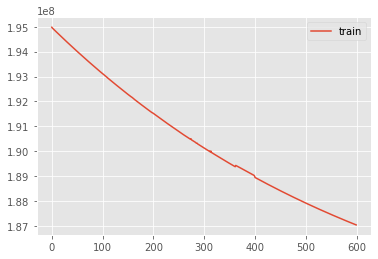

In [206]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

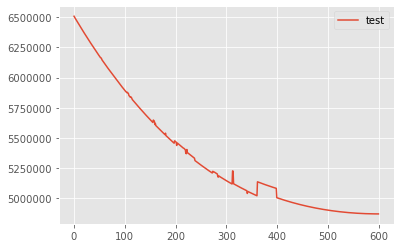

In [209]:
# plot history
#plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()